Почитать про:

Stochastic Gradient Descent

SVM

Cohen’s kappa statistic


<br><br><br>


Написать про:

для кластеризации, для data representation сделать отдельные файлы

Pipeline


In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

#Разбиение выборки

In [3]:
from sklearn.model_selection import train_test_split
#                                                         defoult = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


#Feature encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(["paris", "paris", "tokyo", "amsterdam"])
print(f'List of encoded labels: {enc.transform(["tokyo", "tokyo", "paris"])}')
print(f'Decoded labels: {list(enc.inverse_transform([2, 2, 1]))}')

List of encoded labels: [2 2 1]
Decoded labels: ['tokyo', 'tokyo', 'paris']


In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder() # также можно использовать drop='first' чтобы пропустить первый признак
enc.fit([["paris"], ["paris"], ["tokyo"], ["amsterdam"]])
print(f'Categories: {enc.categories_}')
print(f'Feature names for column names: {enc.get_feature_names_out(["city", ])}')
print(f'List of encoded labels: \n{enc.transform([["tokyo"], ["tokyo"], ["paris"]]).toarray()}')
print(f'Decoded labels: \n{enc.inverse_transform([[0., 0., 1.], [0., 0., 1.], [0., 1., 0.]])}')

Categories: [array(['amsterdam', 'paris', 'tokyo'], dtype=object)]
Feature names for column names: ['city_amsterdam' 'city_paris' 'city_tokyo']
List of encoded labels: 
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
Decoded labels: 
[['tokyo']
 ['tokyo']
 ['paris']]


In [5]:
# OneHot for MultiLabel task
from sklearn.preprocessing import MultiLabelBinarizer

enc = MultiLabelBinarizer()
enc.fit_transform([['sci-fi', 'thriller'], ['comedy']])

array([[0, 1, 1],
       [1, 0, 0]])

```
sklearn.preprocessing.KBinsDiscretizer
```
Превращает непрерывные данные в дискретные, с заданным количеством bins. Не знаю зачем можно использовать, но звучит интересно

##Scaling

On the left side - full data, on the rigth sidw zoomed-id data

For more information folow: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py 

p.s. там есть красивые картинки

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

```
StandardScaler()
RobustScaler()
```
StandardScaler смещает центр данных в 0 и маштабирует данные приводя их к еденичной дисперсии. 

Формула: new_x = (x - mean) / std, где mean - среднее, std - среднеквадратичное отклонение

На пркатике многие алгоритмы требуют чтобы данные имели нулевое среднее и общую дисперсию. Иначе если, например, дисперсия, одного из признаков больше остальных, то он может начать доминировать над остальными, в результате модель не сможет обучиться на других признаках как от нее ожидается.

В этой реализации при помощи аргумаетов `with_mean=False, with_std=False` можно исключить из формалы приведение к нулевому среднему и еденичному СКО.

RobustScaler делат примерно тоже самое, но прицип его работы основан на перцентилях. И его стоит применять на для данных с большим количеством выборсов, поскольку он **нечуствителен к выбросам** (StandardScaler тоже справляется с ними, но Robust пережевывает их лучше).

```
MinMaxScaler()
MaxAbsScaler()
```

MinMaxScaler маштабирует данные в промежуток [0, 1] выполняя простое линейное преобразование.

MaxAbsScaler похож на MinMax, но маштабирует данные в промежуотки (-1, 1], [-1, 1), [-1, 1].

При этом если получаемая на вход выборка положительна, то результат работы обоих алгоритмов будт один и тотже.

Как пишут преимущество этих алгоритмов включает в себя устойчивость к очень малым стандартным отклонениям функций и сохранение нулевых записей в разреженных данных (второе сомнительная штука как по-мне, можно получить используя `with_mean=False` в StandardScaler)

Эти алгоритмы сильно чуствительны к выбросам. И обычно "применяются для разреженных данных".

```
PowerTransformer(method="yeo-johnson")
PowerTransformer(method="box-cox")
```

PowerTransformer make the data more Gaussian-like. От маштабиркет данные к нулевому среднему, с еденичной дисперсией и минимизирует **ассиметричность** данных. Естественно, при этом уже выполняются нелинейные преобразования.

Важно, что Box-Cox может быть применен только над строго положительными данными, если это не так, то стоит использовать Yeo-Johnson.

Достаточно хорошо "сжимет" данные в какие-то рамки.



```
QuantileTransformer(output_distribution='uniform') # default
```
Равномерно расперделяет данные в промежутке [0, 1] (данные по каждому фактору будут распределены по **Равномерному закону распределения**). Выглядит как равномерно закрашенный квадратик со стороной 1.

Как можно понять он делат выбросы неотличимыми от остальных данных (**"обрезает" вбыросы**). Что делает его **нечуствительным к выбросам**.

```
QuantileTransformer(output_distribution='normal')
```
Приводит данные к "идеальному" Нормальному распределению. Тоже устойчив к выбросам.



```
Normalizer()
```
Какая-то эльфийская магия. Но пусть будет. 

Преобразовывает данные в точки на еденичной окружности, при этом строятся только те четверти круга, в которых присутствуют какеи-либо данные.


#Классификация

##k-nearest neighbors

```
sklearn.neighbors.KNeighborsClassifier
sklearn.neighbors.RadiusNeighborsClassifier
```

Also see NCA in Dimensionality reduction

Требователен к нормализации данных, особенно в простанствах с большим кол-вом измерений.

Еще есть метод, работающий по аналогичному принципу, но использует вместо k-ближайших, соседей в заданном радиусе.

Parameters
*   n_neighbors:int
*   metric:str or callable, default=’minkowski’
*   p:int, default=2 - Power parameter for the Minkowski metric (2 - equivalent  to standard Euclidean metric)




## LogisticRegression

```
sklearn.linear_model.LogisticRegression
```

В sklearn есть выбор алгоритмов, каждый из которых является оптимальным в различных члучаях: `solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’`

The solver “liblinear” uses a coordinate descent (CD) algorithm, and relies on the excellent C++

The “lbfgs”, “sag” and “newton-cg” are found to converge faster for some high-dimensional data. Работают лучше с  multi_class = “multinomial”.

The “sag” solver uses Stochastic Average Gradient descent. It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.

The “lbfgs” is an optimization algorithm is recommended for use for small data-sets

## SVM

```
sklearn.svm.SVC, LinearSVC, NuSVC
```

**It is highly recommended to scale your data**

Основной параметр - kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}. L2 - параметр "С" is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization. В зависимотси от выбранного ядра дополнительно: gamma, coef0 and degree.

For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.

SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulation. Параметр Ню используется вместо "C" и контролирует кол-во ошибочно классифицированных точек при выборе отступов (margin errors) с одной стороны и количство используемых опорных векторов (number of support vectors) с другой. Находится в пределах (0, 1]. 1 соответствует fraction (fraction - доля, дробная часть) margin errors, 0 - fraction of support vectors

Kernel cache size -  If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).

## RandomForestClassifier

```
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1)
```
Переобучается на random numerical feature (если просто добавить фактор с рандомными числами, то этот фактор будет иметь достаточно сильное влияние на результат). Есть еще предположение, что на любом факторе, который имеет большое число уникальных значений (числовой или порядковый всеравно, хотя для порядкового звучит логичнее), но явно об этом не написано.


# Регрессия

##k-nearest neighbors

```
sklearn.neighbors.KNeighborsClassifier
sklearn.neighbors.RadiusNeighborsClassifier
```

Требователен к нормализации данных, особенно в простанствах с большим кол-вом измерений. Применим в большей степени к непрерываным данным, чем к данным в которых большое число дискретных переменных. 

## Linear regressions

```
from sklearn.linear_model import LinearRegression
```
Простая модель линейной регресси, неизвестные которой находятся по МНК


---


```
from sklearn.linear_model import Lasso
Lasso(alpha=0.1)
```
Линейная модель с L1 регуляризацией. Т.е. модель штрафует большие значения коэффициентов перед неизвестными, добавляя сумму весов *по модулю*. Чем больше параметр alpha, тем сильнее урезаются веса.

Этот тип регуляризации приводит к тому, что некоторые незначимые коэффициенты обнуляются.

```
from sklearn.linear_model import Ridge
Ridge(alpha=0.1)
```
Линейная модель с L2 регуляризацией. Т.е. модель штрафует большие значения коэффициентов перед неизвестными, добавляя сумму весов *в квадрате*. Чем больше параметр alpha, тем сильнее урезаются веса.

В отличе от Lasso тут коэффициенты в уравении не обнуляются, а только стремятся к 0.

**Обе модели могут использоваться для отбора факторов.**

```
from sklearn.linear_model import ElasticNet
ElasticNet(alpha=1.0, l1_ratio=0.5)
```
Совмещает в себе L1 и L2 регуляризацию. Elastic-net is useful when there are multiple features that are correlated with one another.



---

Least Angle Regression - Least-angle regression (LARS) is a regression algorithm for high-dimensional data. Сильно чуствителен к выбросам

Stochastic Gradient Descent - **high-dimensional data**

Orthogonal Matching Pursuit (OMP) - orthogonal matching pursuit can approximate the optimum solution vector with a **fixed number of non-zero elements**. OMP is based on a greedy algorithm that includes at each step the atom most highly correlated with the current residual. Аt each iteration, the residual is recomputed using an orthogonal projection on the space of the previously chosen dictionary elements.
```
from sklearn.linear_model import OrthogonalMatchingPursuit
model = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
```

## SVM

```
sklearn.svm.SVR, LinearSVR, NuSVR
```

См. Классификацию

## RandomForest


```
sklearn.ensemble.RandomForestClassifier
```
См. Классификацию


## PolynomialFeatures

In [7]:
from sklearn.preprocessing import PolynomialFeatures

X_inp = np.arange(6).reshape(3, 2)
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X_inp)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [8]:
from sklearn.preprocessing import SplineTransformer
X_inp = np.arange(6).reshape(3, 2)
spline = SplineTransformer(degree=3, n_knots=5)
# n_knots - число узловых точек
# degree - сепень "базовой" функции/линии для сплайна, пролегающих между узловыми точками
spline.fit_transform(X_inp)

array([[0.16666667, 0.66666667, 0.16666667, 0.        , 0.        ,
        0.        , 0.        , 0.16666667, 0.66666667, 0.16666667,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.16666667, 0.66666667, 0.16666667,
        0.        , 0.        , 0.        , 0.        , 0.16666667,
        0.66666667, 0.16666667, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.16666667,
        0.66666667, 0.16666667, 0.        , 0.        , 0.        ,
        0.        , 0.16666667, 0.66666667, 0.16666667]])

#Dimensionality reduction

##Neighborhood Components Analysis or NCA

Also it could boost KNN score by modifinig the point space compared to the original point space

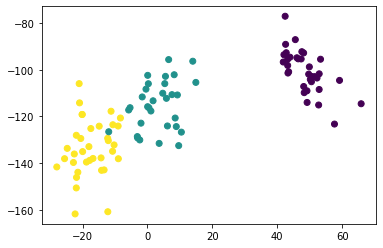

In [9]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=0)
nca.fit(X_train, y_train)
df = pd.DataFrame(nca.transform(X_train))

plt.figure()
plt.scatter(df.iloc()[:, 0], df.iloc()[:, 1], c=y_train)
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# boosting knn score (эти данные слишком простые для такой задачи, поэтому оценка даже упала)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print(f'Classic KNN score: {model.score(X_test, y_test)}')

nca = NeighborhoodComponentsAnalysis(random_state=0)
nca.fit(X_train, y_train)
model.fit(nca.transform(X_train), y_train)
print(f'KNN with NCA transformation score: {model.score(nca.transform(X_test), y_test)}')

Classic KNN score: 0.96
KNN with NCA transformation score: 0.94


# Model selection

## Cross-validation

Разбивает выборку на n подвыборок и обучает модель на n-1 подвыборках используя в для валидации одну оставшуюся часть. На основании полученных данных можно посмотреть стредний score и его стандартное отклонение.


```
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
scores.keys() >>> ['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
scores['test_recall_macro']

print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresеще['test_recall_macro'].mean(), scores['test_recall_macro'].std()))
```

Еще интересная штука. Она выбирает подвыборки случайно, а не последовательно.

```
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)
```



## ValidationCurve

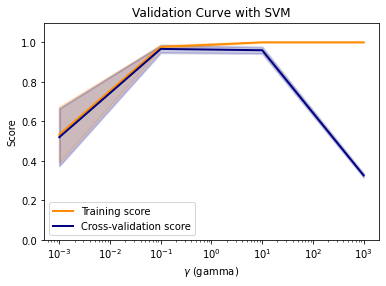

In [11]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

param_range = np.logspace(-3, 3, 4)

train_scores, test_scores = validation_curve(SVC(), X, y,
                                             param_name='gamma',
                                             param_range=param_range, cv=3)

plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## GridSearchCV

Некоторые модлеи "нативно" поддерживают поиск оптимальных параметров, поэтому лучше использовать их. Названия их классов оканчиваются на CV, например, linear_model.ElasticNetCV, linear_model.LassoCV

Для моделей, которые используют бэггинг (леса) не целесообразно использовать cross-validation (разбиене на подвыборки).

При помощи HalvingGridSearchCV можно ускорить процесс, за счет того, что изначально плохие модели будут отбрасфываться на первых итерациях.

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': [0.01, 1, 100]}
# Еще один возможный вариант:
# parameters = [{'kernel': ['linear']},
#               {'kernel': ['poly'], 'degree': [2, 3], 'C': [100]},
#               {'kernel': ['rbf'], 'C': [0.01, 1, 10]},]

svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001635,0.000367,0.000660,0.000170,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.900000,0.966667,0.866667,0.966667,0.900000,0.920000,0.040000,6
1,0.001663,0.000028,0.000626,0.000019,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.900000,0.933333,0.900000,0.966667,0.933333,0.926667,0.024944,5
2,0.000764,0.000045,0.000368,0.000008,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,1
3,0.001098,0.000208,0.000531,0.000130,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,0.966667,0.966667,0.933333,1.000000,0.966667,0.021082,3
4,0.000810,0.000040,0.000386,0.000022,100,linear,"{'C': 100, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.933333,1.000000,0.966667,0.042164,3
5,0.000803,0.000021,0.000381,0.000007,100,rbf,"{'C': 100, 'kernel': 'rbf'}",1.000000,1.000000,0.900000,0.966667,1.000000,0.973333,0.038873,2


# Feature Selection

## Tree

Feature importance based on mean decrease in impurity (MDI) могут приводить к неверным результатам если какой-либо из признаков имеет большое количество уникальных значений. Сказали, что даже отражается просто на числовых данных. (тогда он вообще получается не очень) 

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
clf.feature_importances_

array([0.13159089, 0.02466521, 0.45266953, 0.39107437])

## Permutation

Перемешивает выборку и в зависимости от того на сколько сильно поменялось значение метрики по сравнению с baseline (без перестановок) говорит о ее важности

Работет плохо при наличии мультиколениарности. Это можно отчетливо видеть в случае, когда модель показывает хороший результат, но при это ни один фактор незначим.

In [14]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1).fit(X_train, y_train)
permutation_importance(forest, X_test, y_test, n_repeats=5, random_state=1, n_jobs=-1)

{'importances': array([[0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.02, 0.  , 0.  , 0.  , 0.  ],
        [0.38, 0.4 , 0.3 , 0.32, 0.44],
        [0.14, 0.2 , 0.18, 0.12, 0.16]]),
 'importances_mean': array([0.   , 0.004, 0.368, 0.16 ]),
 'importances_std': array([0.        , 0.008     , 0.05153639, 0.02828427])}

In [15]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=1).fit(X_train, y_train)
permutation_importance(log, X_test, y_test, n_repeats=5, random_state=1, n_jobs=-1)

{'importances': array([[0.02, 0.02, 0.02, 0.02, 0.02],
        [0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.6 , 0.62, 0.54, 0.56, 0.72],
        [0.18, 0.16, 0.16, 0.1 , 0.2 ]]),
 'importances_mean': array([0.02 , 0.   , 0.608, 0.16 ]),
 'importances_std': array([0.        , 0.        , 0.06273755, 0.0334664 ])}

# Support Tools

## Confusion matrix


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=1).fit(X_train, y_train)

cm = confusion_matrix(y, log.predict(X))
cm

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])

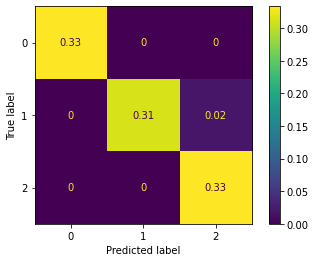

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y, log.predict(X), labels=log.classes_, normalize='all')

## Correlatoin matrix

Про коэфы корреляции:

Коэффициент корреляции Спирмена более устойчив к наличию выбросов (он еще называется ранговым коэффициентом корреляции Спирмена, тоесть основан на рангах), чем метод Пирсона. И предпочтителен когда данные распределены НЕ по нормальному закону. (соотвественно делаю вывод, что Пирсон лучше использовать для Нормально распределенных данных)

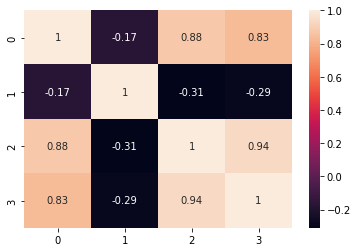

In [14]:
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

# создаем матрицу корреляции
corr = spearmanr(X).correlation
# еще варианты
# corr = spearmanr(X, y).correlation
# corr = pd.DataFrame(X).corr(method={‘pearson’, ‘kendall’, ‘spearman’, "callable"} )

sns.heatmap(corr, annot = True)

plt.show()

## Classification Report

In [19]:
from sklearn.metrics import classification_report
# 0, 1, 2 - это классы
print(classification_report(y, log.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



## Отчет по линейной модели

In [15]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           3.83e-62
Time:                        06:59:28   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

# Metrics classification

Есть несколько типов усреднения метрик, которые становятся важны в случаях когда мы имеем дело с несбалансированными/перекошенными (по кол-ву наблюдений) классами.
- "macro" - вычисляет метрику внутри каждого класса, а замем усредняет эти значения. 
- "weighted" - аналогично macro, но при этом классам могут присваиваться веса
- "micro" - вычисляет метрику по каждому элементу (бер пару элемент-класс, выисляет значение метрики и добавляет ее в общее значение)

## Accuracy

Делит кол-во правильно предсказанных элементов на общее кол-во

Плохо работает, если классы несбалансированы

Мало где используется на практике

```
from sklearn.metrics import accuracy_score
```



## Precision, recall and F-measures

<table>
	<tbody>
		<tr>
			<td></td>
			<th>Actual <br> positive</th>
			<th>Actial <br> negative</th>
		</tr>
		<tr>
			<th>Predicted <br> positive</th>
			<td>TP</td>
			<td>TN</td>
		</tr>
		<tr>
			<th>Predicted <br> negative</th>
			<td>FN</td>
			<td>FP</td>
		</tr>
	</tbody>
</table>

### Precision
Точность показывает какая доля объектов, выделенная классификатором как положительная, действительно является положительной

$Precision = \frac{TP}{TP + FP}$

```
sklearn.metrics.precision_score
```

### Recall
Полнота показывает какая доля положительных объектов была выделена классификатором как положительная

$Recall = \frac{TP}{TP + FN}$

```
sklearn.metrics.recall_score
```

### F-score
Совмещает Precision и Recall. При помощи парметра $\beta$ можно смещать акцент в сторону Precision или Recall ($\beta \to 0$ considers only Precision, $\beta \to \infty$ only Recall, $\beta = 1$ соотвествует F1 мере).

```
sklearn.metrics.fbeta_score
```
Точность, полнота и F-score подходят для оценки качества на несбалансированных выборках

При этом еще важным становится выбор порога (threshold). У модели вызвается метод `predict_proba` ресуется график значения метрики при разных пороговых значениях и выбирается порог при котором достигается максимальное значение метрики (график можно не рисовать, а просто сразу выбрать максимум)

## ROC AUC

Способ оценки качества классификации без необходимости подбора порога

Неинформативен в случае несбалансированных выборок

## Logloss

Одно близкое к нулю значение под логарифмом (предсказаие близкое к 0, когда ответ 1 или наоборот) может сильно испортить всю метрику (вернуть значение вплоть до $\infty$)


### precision_recall_curve и roc_curve

Мы берм модель делаем предсказания `predict_proba`, затем вычисляем значения для precision и recall нанося эти значения в качестве точек  на график (precision и recall - две координаты этого графика).

В roc_curve аналогично, только precision и recall используются True Positive Rate и False Positive Rate.

С помощью них можно отпределять точность модели (площадь под графиком) и выбирать отптимальный для той или иной задачаи соотношения trashhold

**Подходит только для бинарной классификации**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


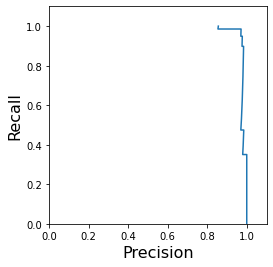

In [69]:
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay

X, y = make_classification(n_samples=1000, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = SVC(probability=True, random_state=0).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, [x[1] for x in model.predict_proba(X_test)])
plt.figure()
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.plot(precision, recall)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

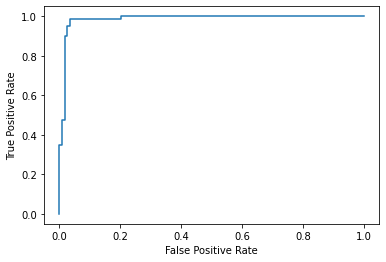

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, [x[1] for x in model.predict_proba(X_test)])
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Metrics regression

## MSE
Mean squared error

Иногда используют корень из нее $RMSE = \sqrt{MSE}$

Штрафует большие ошибки сильней, чем маленькие

MSE и MAE позволяет сравнивать качество моделей между собой

```
from sklearn.metrics import mean_squared_error
```

## MAE
Mean absolute error

Иногда используется вместо MSE из-за большей устойчивости к выбросам
```
from sklearn.metrics import mean_absolute_error
```
## Коэффициент детерминации

Измеряет долю дисперсии, объясненную моделью, и имеет значение от 0 до 1
```
from sklearn.metrics import r2_score
```

## Mean squared logarithmic error

Сильно штрафует за выбросы (risk metric). This metric is best to use when targets having exponential growth
```
from sklearn.metrics import mean_squared_log_error
```

## Median absolute error

Не обращает внимание на отдельные выборсы

```
from sklearn.metrics import median_absolute_error
```

# Working with imbalanced classes

## Over-sampling

У всех методов есть `sampling_strategy`, которая задается по-разному и может ругулировать конечное кол-во элементов в классах

Тут есть несколько методов.

Самый простой - . Тут алогитм просто случайно дублирует элементы меньших по размеру выборок, чтобы приравнять количество элементов в них к большему классу. Есть также вариант когда элементы будут не просто копироваться, но еще и случайно смеещатьсья (т.е. копироваться с разбросом) для этого задачется параметр `shrinkage`. Еще можно задать точные кол-ва элементов для каждого класса `sampling_strategy={0: 60, 1:50, 2:100}`

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (100) in class 2 will be larger than the number of samples in the majority class (class #2 -> 93)
  f"After over-sampling, the number of samples ({n_samples})"


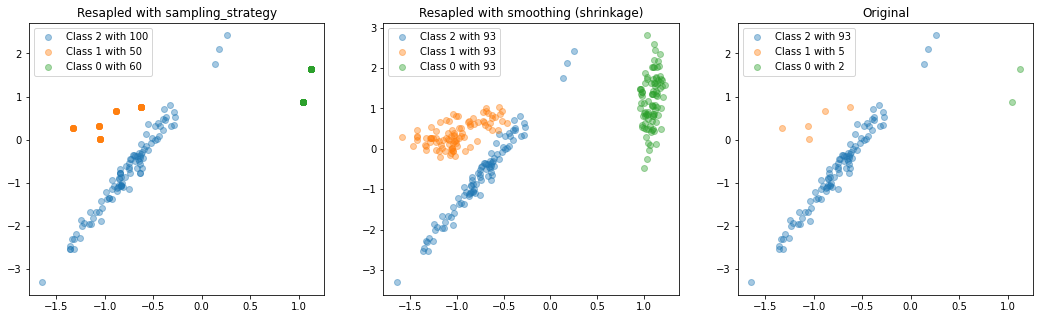

In [74]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from matplotlib import pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.02, 0.05, 0.93],
                           class_sep=0.8, random_state=1)

df = pd.DataFrame(X)
df['y'] = y

#Resapled with sampling_strategy
ros = RandomOverSampler(sampling_strategy={0: 60, 1:50, 2:100}, random_state=0)
X_resampled_1, y_resampled_1 = ros.fit_resample(X, y)

df_resampled_1 = pd.DataFrame(X_resampled_1)
df_resampled_1['y'] = y_resampled_1

#Resapled with smoothing (shrinkage)
ros = RandomOverSampler(shrinkage={0:3, 1:1}, random_state=0)
X_resampled_2, y_resampled_2 = ros.fit_resample(X, y)

df_resampled_2 = pd.DataFrame(X_resampled_2)
df_resampled_2['y'] = y_resampled_2

fig, (ax1 ,ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
for cls in df['y'].unique():
  ax1.scatter(df_resampled_1[df_resampled_1['y']==cls][0], df_resampled_1[df_resampled_1['y']==cls][1], label=f"Class {cls} with {len(df_resampled_1[df_resampled_1['y']==cls][0])}", alpha=0.4)
  ax2.scatter(df_resampled_2[df_resampled_2['y']==cls][0], df_resampled_2[df_resampled_2['y']==cls][1], label=f"Class {cls} with {len(df_resampled_2[df_resampled_2['y']==cls][0])}", alpha=0.4)
  ax3.scatter(df[df['y']==cls][0], df[df['y']==cls][1], label=f"Class {cls} with {len(df[df['y']==cls][0])}", alpha=0.4)

ax1.legend()
ax1.set_title('Resapled with sampling_strategy')

ax2.legend()
ax2.set_title('Resapled with smoothing (shrinkage)')

ax3.legend()
ax3.set_title('Original')

plt.show()

SMOTE и его варианты не дублирует значения переменных а генерирует новые при помощи интерполяции (выглядит как буд-то у класса очерчивают грацицу и набрасывают туда новых точек). При этом для интерполяции могут использоваьтся различные алгоритмы:
<table class="longtable table autosummary">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a><code><span>SMOTE</a>(*[,&nbsp;sampling_strategy,&nbsp;random_state,&nbsp;...])</p></td>
<td><p>Class to perform over-sampling using SMOTE.</p></td>
</tr>
<tr class="row-even"><td><p><a><code><span>SMOTENC</a>(categorical_features,&nbsp;*[,&nbsp;...])</p></td>
<td><p>Synthetic Minority Over-sampling Technique for Nominal and Continuous.</p></td>
</tr>
<tr class="row-odd"><td><p><a><code><span>SMOTEN</a>(*[,&nbsp;sampling_strategy,&nbsp;random_state,&nbsp;...])</p></td>
<td><p>Synthetic Minority Over-sampling Technique for Nominal.</p></td>
</tr>
<tr class="row-even"><td><p><a><code><span>ADASYN</a>(*[,&nbsp;sampling_strategy,&nbsp;random_state,&nbsp;...])</p></td>
<td><p>Oversample using Adaptive Synthetic (ADASYN) algorithm.</p></td>
</tr>
<tr class="row-odd"><td><p><a><code><span>BorderlineSMOTE</a>(*[,&nbsp;sampling_strategy,&nbsp;...])</p></td>
<td><p>Over-sampling using Borderline SMOTE.</p></td>
</tr>
<tr class="row-even"><td><p><a><code><span>KMeansSMOTE</a>(*[,&nbsp;sampling_strategy,&nbsp;...])</p></td>
<td><p>Apply a KMeans clustering before to over-sample using SMOTE.</p></td>
</tr>
<tr class="row-odd"><td><p><a><code><span>SVMSMOTE</a>(*[,&nbsp;sampling_strategy,&nbsp;...])</p></td>
<td><p>Over-sampling using SVM-SMOTE.</p></td>
</tr>
</tbody>
</table>

source with illustrtions: https://imbalanced-learn.org/stable/over_sampling.html

## Combination of over- and under-sampling

У всех методов есть `sampling_strategy`, которая задается по-разному и может ругулировать конечное кол-во элементов в классах

Их тут два `SMOTEENN` и `SMOTETomek`

SMOTEENN tends to clean more noisy samples than SMOTETomek.

Как вариант можно использовать одновременно RandomUnderSampler и RandomOverSampler with sampling_strategy.

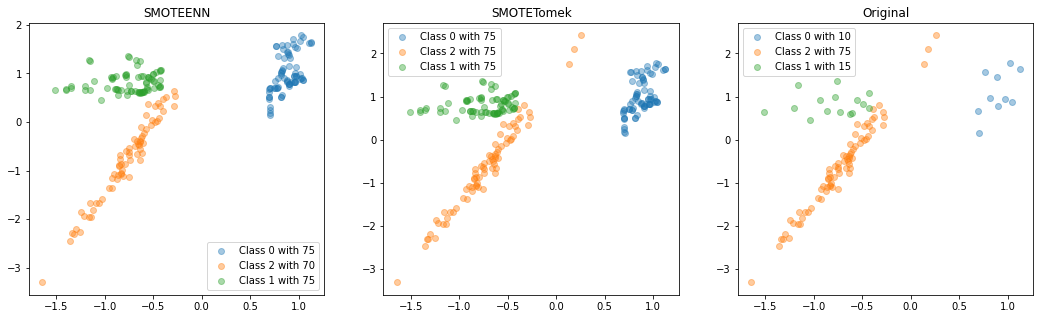

In [62]:
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter
from matplotlib import pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.10, 0.15, 0.75],
                           class_sep=0.8, random_state=1)

df = pd.DataFrame(X)
df['y'] = y

#SMOTEENN
sampler = SMOTEENN(random_state=0)
X_resampled_1, y_resampled_1 = sampler.fit_resample(X, y)

df_resampled_1 = pd.DataFrame(X_resampled_1)
df_resampled_1['y'] = y_resampled_1

#SMOTETomek
sampler = SMOTETomek(random_state=0)
X_resampled_2, y_resampled_2 = sampler.fit_resample(X, y)

df_resampled_2 = pd.DataFrame(X_resampled_2)
df_resampled_2['y'] = y_resampled_2

fig, (ax1 ,ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
for cls in df['y'].unique():
  ax1.scatter(df_resampled_1[df_resampled_1['y']==cls][0], df_resampled_1[df_resampled_1['y']==cls][1], label=f"Class {cls} with {len(df_resampled_1[df_resampled_1['y']==cls][0])}", alpha=0.4)
  ax2.scatter(df_resampled_2[df_resampled_2['y']==cls][0], df_resampled_2[df_resampled_2['y']==cls][1], label=f"Class {cls} with {len(df_resampled_2[df_resampled_2['y']==cls][0])}", alpha=0.4)
  ax3.scatter(df[df['y']==cls][0], df[df['y']==cls][1], label=f"Class {cls} with {len(df[df['y']==cls][0])}", alpha=0.4)

ax1.legend()
ax1.set_title('SMOTEENN')

ax2.legend()
ax2.set_title('SMOTETomek')

ax3.legend()
ax3.set_title('Original')

plt.show()

## Under-sampling

***!!! Конечное кол-во элементов в классах не обязательно равно кол-ву элементов в минимальном классе !!!***

У всех методов есть `sampling_strategy`, которая задается по-разному и может ругулировать конечное кол-во элементов в классах

`ClusterCentroids` - использует алгорим k-ближайших для уменьшения кол-ва элементов класса. При этом в качестве новых элементов выбираются центроиды кластеров.

`RandomUnderSampler` is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. При помощи `sampling_strategy` можно задать кол-во элементов к каждом классе

---

`AllKNN`, `RepeatedEditedNearestNeighbours`, `EditedNearestNeighbours` - примерно одно и тоже, последние два отличаются тем, что Repeated повтояет несколько раз EditedNearestNeighbours, AllKNN, базируется на Repeated c правками (на каждой итерации увеличивается количество соселей в knn)

`OneSidedSelection` - убирает шумы при помощи knn

`NeighbourhoodCleaningRule` - сосредоточty на очистке данных, а не на их сжати, тоже knn

---

`InstanceHardnessThreshold` is a specific algorithm in which a classifier is trained on the data and the samples with lower probabilities are removed. Работает неплохо. estimator - модель sklern или одна из 'knn', 'decision-tree', 'random-forest', 'adaboost', 'gradient-boosting' and 'linear-svm'

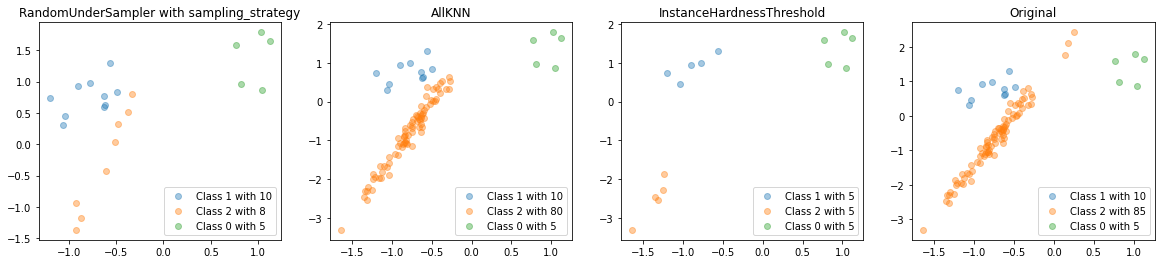

In [81]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler, InstanceHardnessThreshold, AllKNN
from matplotlib import pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.05, 0.10, 0.85],
                           class_sep=0.8, random_state=1)

df = pd.DataFrame(X)
df['y'] = y

#RandomUnderSampler with sampling_strategy
sampler = RandomUnderSampler(sampling_strategy={0: 5, 1:10, 2:8}, random_state=0)
X_resampled_1, y_resampled_1 = sampler.fit_resample(X, y)

df_resampled_1 = pd.DataFrame(X_resampled_1)
df_resampled_1['y'] = y_resampled_1

#AllKNN
sampler = AllKNN(n_jobs=-1, sampling_strategy=[2]) # sampling_strategy=[2] - уменьшаем только класс 2
X_resampled_2, y_resampled_2 = sampler.fit_resample(X, y)

df_resampled_2 = pd.DataFrame(X_resampled_2)
df_resampled_2['y'] = y_resampled_2

#InstanceHardnessThreshold
model = LogisticRegression()
model.fit(X, y)
sampler = InstanceHardnessThreshold(n_jobs=-1, estimator=model, random_state=1)
X_resampled_3, y_resampled_3 = sampler.fit_resample(X, y)

df_resampled_3 = pd.DataFrame(X_resampled_3)
df_resampled_3['y'] = y_resampled_3

fig, (ax1 ,ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
for cls in df['y'].unique():
  ax1.scatter(df_resampled_1[df_resampled_1['y']==cls][0], df_resampled_1[df_resampled_1['y']==cls][1], label=f"Class {cls} with {len(df_resampled_1[df_resampled_1['y']==cls][0])}", alpha=0.4)
  ax2.scatter(df_resampled_2[df_resampled_2['y']==cls][0], df_resampled_2[df_resampled_2['y']==cls][1], label=f"Class {cls} with {len(df_resampled_2[df_resampled_2['y']==cls][0])}", alpha=0.4)
  ax3.scatter(df_resampled_3[df_resampled_3['y']==cls][0], df_resampled_3[df_resampled_3['y']==cls][1], label=f"Class {cls} with {len(df_resampled_3[df_resampled_3['y']==cls][0])}", alpha=0.4)
  ax4.scatter(df[df['y']==cls][0], df[df['y']==cls][1], label=f"Class {cls} with {len(df[df['y']==cls][0])}", alpha=0.4)

ax1.legend()
ax1.set_title('RandomUnderSampler with sampling_strategy')

ax2.legend()
ax2.set_title('AllKNN')

ax3.legend()
ax3.set_title('InstanceHardnessThreshold')

ax4.legend()
ax4.set_title('Original')

plt.show()